## Logistic regression
### Visualizing data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy import signal
import tkinter as tk
from tkinter import filedialog
import pathlib
from pathlib import Path
import os
import time
import librosa
import IPython.display as ipd
from librosa import display
import pandas as pd

In [2]:
cwd = Path.cwd()
file_path = Path(cwd).joinpath(r'Unit4', 'input_dataset-2.parquet')
print(file_path)

C:\Users\100cgj\OneDrive - Sysco AS\Dokumenter\Hackaton\krafthack2022onsite\Unit4\input_dataset-2.parquet


In [3]:
tic = time.time()
df = pd.read_parquet(file_path)
toc = time.time()
print("Load Time:",toc-tic)
print(df.tail)

Load Time: 5.117496967315674
<bound method NDFrame.tail of                      Unit_4_Power  Unit_4_Reactive Power  \
timepoints                                                 
1970-12-19 09:51:44    262.204308               2.899036   
1970-12-19 09:51:45    262.104319               3.344630   
1970-12-19 09:51:46    262.004330               3.790223   
1970-12-19 09:51:47    261.904340               4.235817   
1970-12-19 09:51:48    261.804351               4.064759   
...                           ...                    ...   
1971-01-25 11:06:44    308.716025               3.974309   
1971-01-25 11:06:45    308.746393               4.103262   
1971-01-25 11:06:46    308.776762               4.472929   
1971-01-25 11:06:47    308.807131               4.842597   
1971-01-25 11:06:48    308.837499               5.212264   

                     Turbine_Guide Vane Opening  Turbine_Pressure Drafttube  \
timepoints                                                                    
19

In [5]:
dfColumns = df.columns
data = []
for x in dfColumns:
    data.append(df[x])

## Unfixed Data

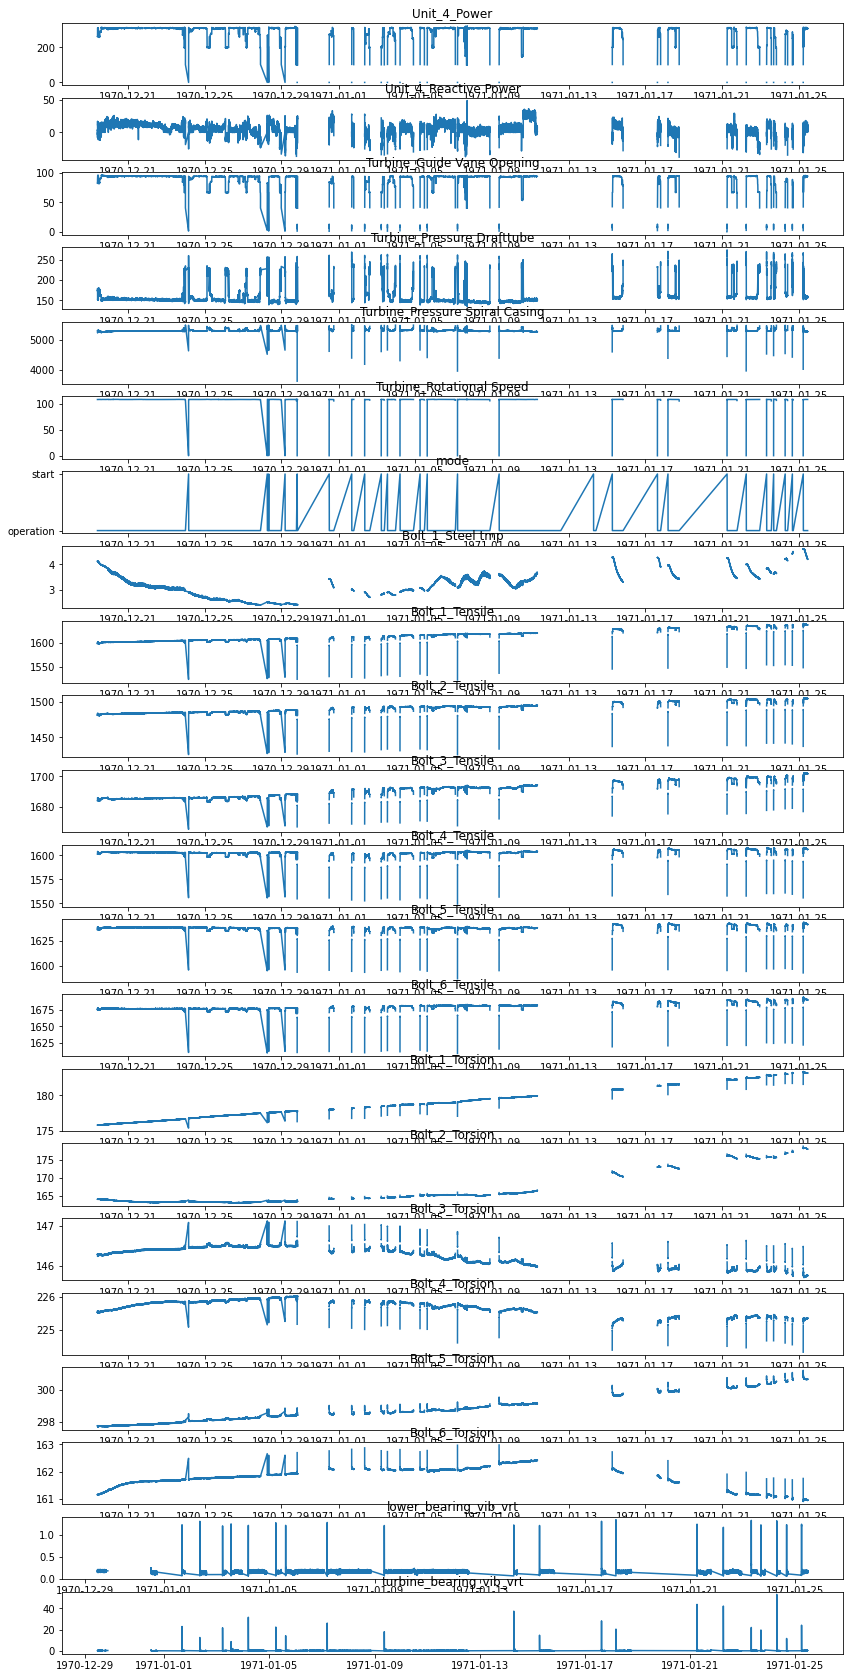

In [20]:
fig, axs = plt.subplots(len(data), figsize = (14, 30))
axs = axs.flatten()
for i in range(0,len(axs)):
    axs[i].plot(data[i])
    axs[i].set_title(dfColumns[i])
plt.subplots_adjust(hspace=0.2)
plt.show()

## Fix the data and save to a new files with fixed data